# **Practice 7: Discrete systems**
## **Goals for today**

---

During today practice we will:
* Discrete-time state space model
* Stability theory for discrete case
* Feedback control for discrete systems



## **Discrete-time state space model**

**Discrete-time systems** are either inherently discrete (e.g. models of bank accounts, national economy growth models, population growth models, digital words) or they are obtained as a result of sampling (discretization) of continuous-time systems. In such kinds of systems, inputs, state space variables, and outputs have the discrete form and the system models can be represented in the form of transition tables.

The mathematical model of a discrete-time system can be written in terms of a recursive formula by using linear matrix **difference equations** as:

\begin{equation}
\begin{cases} 
\mathbf{x} [(k+1)T] = \mathbf{A_dx} [kT] + \mathbf{B_du} [kT]\\
\mathbf{y} [kT] = \mathbf{C_dx} [kT] + \mathbf{D_du} [kT]
\end{cases} 
\end{equation}

where
*   $\mathbf{x} [(k+1)T]$ - system state vector in the future
*   $\mathbf{x} [kT]$ - current system state vector
*   $\mathbf{y} [kT]$ - current output vector
*   $\mathbf{u} [kT]$ - control inputs
*   $\mathbf{A_d}$ - discrete state matrix
*   $\mathbf{B_d}$ - discrete input matrix
*   $\mathbf{C_d}$ - discrete output matrix
*   $\mathbf{D_d}$ - discrete feedforward matrix

Note that $\mathbf{A_d}$ and $\mathbf{B_d}$ are obtained for the time interval from to $0$ to $T$. It can easily be shown that due to system time invariance the same expressions for $\mathbf{A_d}$ and $\mathbf{B_d}$ are obtained for any time interval.


## **Approximations**
Real physical dynamic systems are continuous in nature, but since computers are discrete in idea, let's look at an example of transformation from continuous systems to discrete.

Let's compare discrete model with continuous-time state space:
\begin{equation}
\begin{cases} 
\mathbf{\dot{x}} =\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\ 
\mathbf{y}=\mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}

Let's apply the **Euler method** for the first equation. It is based on the approximation of the first derivative at $t = kT$:
\begin{equation}
\mathbf{\dot{x}} = \frac{d\mathbf{x}}{dt} \approx \frac{1}{T}\left(\mathbf{x} [(k+1)T] - \mathbf{x}[kT]\right)
\end{equation}

Applying this approximative formula to the state space system equation, we have:

\begin{equation}
\frac{1}{T}\left(\mathbf{x} [(k+1)T] - \mathbf{x}[kT]\right) \approx \mathbf{A}\mathbf{x}[kT] + \mathbf{B}\mathbf{u}[kT]
\end{equation}

So, after the little changes we obtain:
\begin{equation}
\mathbf{x} [(k+1)T] \approx (I+T\mathbf{A})\mathbf{x}[kT] + T\mathbf{B}\mathbf{u}[kT]
\end{equation}

Then we can conclude that $\mathbf{A_d} = (I+T\mathbf{A})$ and $\mathbf{B_d} = T\mathbf{B}$

### **Example**

> **Mass-spring-damper system**
>
>Consider a following unforced system:
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>
>
>Dynamics of this system desribed by following ODE:
\begin{equation}
m\ddot{y} + b \dot{y} + k y = u
\end{equation}
>
>And one can formulate this system in state space as:
\begin{equation}
\dot{\mathbf{x}}
 = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}+
\begin{bmatrix}
0\\
\frac{1}{m}
\end{bmatrix}
u
\end{equation}
>
> In discrete space this model will have a following form:
> \begin{equation}
\mathbf{x}[(k+1)T]
 = \mathbf{A_d}\mathbf{x}[kT] + \mathbf{B_d}\mathbf{u}[kT] =
\begin{bmatrix}
y[(k+1)T]\\
y[(k+2)T]
\end{bmatrix}
=
\begin{bmatrix}
1 & 1\\
-\frac{k}{m}T & 1-\frac{b}{m}T
\end{bmatrix}
 \begin{bmatrix}
y[kT]\\
y[(k+1)T]
\end{bmatrix}+
\begin{bmatrix}
0\\
\frac{1}{m}T
\end{bmatrix}
u[kT]
\end{equation}

>### **Exercise**
>Find the exact and approximate descretization of the following systems. 
* $\dot x = 
\begin{bmatrix} 10 & 0 \\ -5 & 10
\end{bmatrix}
x
+
\begin{bmatrix} 
2 \\ 0
\end{bmatrix}
u
$\
>\
>when $T=0.1$ sec
>
>* $\dot x = 
\begin{bmatrix} 2 & 2 \\ -6 & 10
\end{bmatrix}
x
+
\begin{bmatrix} 
0 & -1 \\ 5 & -1
\end{bmatrix}
u
$\
>\
>when $T = 0.5$ sec

## **Solution of the Discrete-Time state equation**

We find the solution of the difference state equation for the given initial state $\mathbf{x}[0]$ and the input signal $\mathbf{u}[kT]$. From the state equation:
$$
\mathbf{x} [(k+1)T] = \mathbf{A_dx} [kT] + \mathbf{B_du} [kT]\
$$
for $k = 1, 2 ...$ it follows:
$$
\mathbf{x}[T] = \mathbf{A_dx} [0] + \mathbf{B_du} [0]\\
\mathbf{x}[2T] = \mathbf{A_dx} [T] + \mathbf{B_du} [T] = \mathbf{A_d}^2\mathbf{x} [0] + \mathbf{A_d}\mathbf{B_du} [0] + \mathbf{B_du} [T] \\
\mathbf{x}[3T] = \mathbf{A_dx} [2T] + \mathbf{B_du} [2T] = \mathbf{A_d}^3\mathbf{x} [0] + \mathbf{A_d}^2\mathbf{B_du} [0] + \mathbf{A_d}\mathbf{B_du} [T]+\mathbf{B_du} [2T] \\
\vdots \\
\mathbf{x}[kT] =  \mathbf{A_dx} [(k-1)T] + \mathbf{B_du} [(k-1)T] = \mathbf{A_d}^2\mathbf{x} [0] + \sum^{k-1}_{i=0} \mathbf{A_d}^{k-i-1}\mathbf{B_du} [i]
$$



## **Stability**

The concepts of stability is fairly general and can be applied to the descrete time systems, however, in this case solutions may be analized directly, and stability criterias are the following:


*   Asymptotically stable $|\lambda_i| = \sqrt{\operatorname{Re}(\lambda_i)^2 + \operatorname{Im}(\lambda_i)^2} < 1,\forall i$ 
*   Lyapunov stable: $ |\lambda_i|\leq 1,\forall i$
*   Unstable: $\exists\lambda_i, |\lambda_i|>1 $

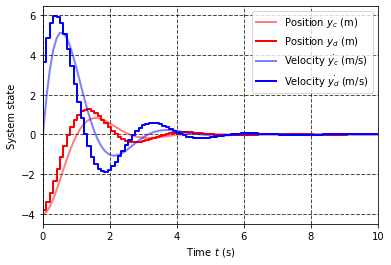

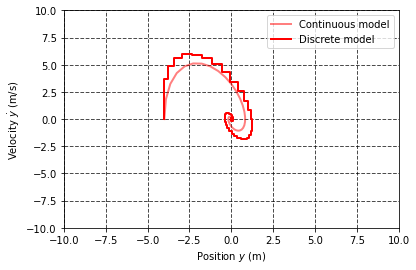

In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint

def StateSpace_without_control(x, t, A):
  return np.dot(A,x)

#@markdown Mass-spring-damper parameters

m = 1 #@param {type:"slider", min:0, max:10, step:1}
k = 5 #@param {type:"slider", min:0, max:5, step:0.1}
b = 2 #@param {type:"slider", min:0, max:5, step:0.1}
T = 0.102 #@param {type:"slider", min:0.001, max:1, step:0.001}

t0 = 0
tf = 10
t = np.arange(t0, tf, T)

A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0],
              [1/m]])

x0 = np.array([-4, 0])

x_d = x0
x_disc = x0

A_d = np.eye(2) + T*A

# Simulation for discrete time model
for time in t:
  x_d = A_d @ x_d
  x_disc = np.vstack((x_disc, x_d))

y_disc, dy_disc = x_disc[:,0], x_disc[:,1] 
t_disc = np.insert(t, 0, 0)

# Simulation for continuous time model
x_sol = odeint(StateSpace_without_control, x0, t, args=(A,))

y_cont, dy_cont = x_sol[:,0], x_sol[:,1]

plot(t, y_cont, 'r', linewidth=2.0, label = r'Position $y_c$ (m)', alpha = 0.5)
step(t_disc, y_disc, 'r', linewidth=2.0, label = r'Position $y_d$ (m)')
plot(t, dy_cont, 'b', linewidth=2.0, label = r'Velocity $\dot{y_c}$ (m/s)', alpha = 0.5)
step(t_disc, dy_disc, 'b', linewidth=2.0, label = r'Velocity $\dot{y_d}$ (m/s)')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

plot(y_cont, dy_cont, 'r', linewidth = 2., alpha = 0.5, label = 'Continuous model')
step(y_disc, dy_disc, 'r', linewidth = 2., label = 'Discrete model')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Position $y$ (m)')
xlim([-10, 10])
ylim([-10, 10])
show()

## **Descrete Feedback**

The general form of feedback that may stabilize our system is linear as well as for continues time system:
\begin{equation}
\mathbf{u}[kT]=-\mathbf{K}\mathbf{x}[kT]
\end{equation}

## **Pole Placement for descrete systems**

Previously we have designed a stable poles for continues time systems by placing them on the left hand side of comple plane. In case of descrete time systems we should place them inside of **unit circle**


>### **Example**

> **Model of Love**\
>Let us consider the example of "love" equations given in the first practice:
$$
\begin{cases}
\dot{R}=aR+bJ \\
\dot{J}=cR+dJ
\end{cases}
$$
>
>when $R$ and $J$ are time depended functions of Romeo's or Juliet's love (or hate if negative) and $a$, $b$, $c$ and $d$ is constants that determine the "Romantic styles". 
>Suppose we can control Romeo's feelings with the coefficient $e$. So our control system will have following form:
\begin{equation}
\begin{bmatrix}
\dot{R} \\
\dot{J} 
\end{bmatrix} = 
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix}
R \\
J 
\end{bmatrix} +
\begin{bmatrix}
e \\0 
\end{bmatrix}
u
\end{equation}
>
>Let's set the control signal to the following form:
$u = -\begin{bmatrix}
k_1 & k_2 
\end{bmatrix}\begin{bmatrix}
R \\
J 
\end{bmatrix}$
>
> Also consider that we may meet with Romeo every few days, the difference in our meetings we denote as $T$, thus after all of our changes we get following descrete system:
\begin{equation}
\begin{bmatrix}
R[(k+1)T] \\
J[(k+1)T] 
\end{bmatrix} = 
\left(\begin{bmatrix}
1+aT & bT \\
cT & 1+dT 
\end{bmatrix}-\begin{bmatrix}
eT \\0 
\end{bmatrix}\begin{bmatrix}
k_1 & k_2 
\end{bmatrix} \right)
\begin{bmatrix}
R [kT]\\
J [kT]
\end{bmatrix}
\end{equation}

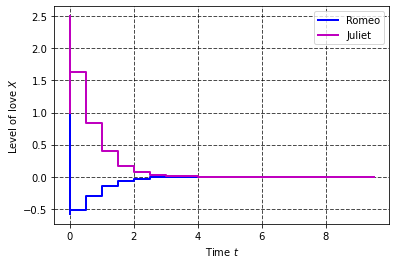

Eigen values of original system:
[ 2.93649167 -0.93649167]

Eigen values for system with control:
[0.3 0.4]


In [ ]:
from scipy.signal import place_poles

#@markdown Romeo's parameters
a = 0 #@param {type:"slider", min:-10, max:10, step:1}
b = 5 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Juliet's parameters
c = 3 #@param {type:"slider", min:-10, max:10, step:1}
d = 0 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown How much did Romeo and Juliet like each other at first sight?
R_0 = 1 #@param {type:"slider", min:-10, max:10, step:1}
J_0 = 1 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Control parameters
e = 1 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Discretization time
T = 0.5 #@param {type:"slider", min:0.01, max:0.5, step:0.01}

#@markdown Poles parameters
p1 = 0.4 #@param {type:"slider", min:-2, max:2, step:0.1}
p2 = 0.3 #@param {type:"slider", min:-2, max:2, step:0.1}

A = np.array([[a, b],
              [c, d]])

B = np.array([[e],
              [0]])

x0 = np.array([R_0,
               J_0])  # initial state

t = np.arange(t0, tf, T)

A_d = np.eye(2) + T*A
B_d = T*B

P = np.array([p1, p2])
pp = place_poles(A_d, B_d, P)
K = pp.gain_matrix

x_d = x0
love = x0

for time in t:
  u_d = - np.dot(K,x_d)  
  x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
  love = np.vstack((love, x_d))

y_disc, dy_disc = x_disc[:,0], x_disc[:,1] 
t_disc = np.insert(t, 0, 0)

R, J = love[:,0], love[:,1]

step(t_disc, R, linewidth=2.0, color = 'b', label = "Romeo")
step(t_disc, J, linewidth=2.0, color = 'm', label = "Juliet")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Level of love ${X}$')
xlabel(r'Time $t$')
legend()
show()

Lambda, Q = np.linalg.eig(A_d)
print(f"Eigen values of original system:\n{Lambda}\n")

Lambda, Q = np.linalg.eig(A_d-np.dot(B_d, K))
print(f"Eigen values for system with control:\n{Lambda}")

>### **Exercises**
>
>1. Find the gains $k_1, k_2$ that will stabilize the following system:
> * $\dot{\mathbf{x}} = 
\begin{bmatrix} 0 & 1\\
 -7 & -7 \end{bmatrix} 
    \mathbf{x} + 
    \begin{bmatrix} 0 \\ 1 \end{bmatrix} \mathbf{u}
  $\
  >\
  >with $T = 0.1$ sec
>
>* $\mathbf{\dot{x}}=\begin{bmatrix}
10 & 5\\
-5 & -10
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
-1\\
2
\end{bmatrix}\mathbf{u}
  $\
  >\
  with $T = 0.6$ sec
>
>* $\mathbf{\dot{x}}=\begin{bmatrix}-8 & 1 \\ -2 & 2
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
2\\
0
\end{bmatrix}\mathbf{u}
  $\
  >\
  with $T = 0.2$ sec
>
> 2. At what time step will the motor stop being stable?  A simplified model of the motor dynamics for this situation:
> $$I\ddot{\theta}+b\dot{\theta} = K_m I$$
> when $I$ - motor rotor moment of inertia, $b$ - coefficient of viscous friction, $K_m$ - motor torque constant. 
> 3. Create a motor position control model with discretization time of $T = 0.1$ sec